In [1]:
from data_prep import *
from PositionModel import *
from PlayerModel import *
from commons import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features = ['goals_scored_avg5', 'xG_avg5', 'assists_fpl_avg5',
       'bonus_avg5', 'bps_avg5', 'clean_sheets_avg5', 'goals_conceded_avg5',
       'shots_avg5', 'xGBuildup_avg5', 'xGChain_avg5', 'yellow_cards_avg5',
       'red_cards_avg5', 'was_home', 'rating_diff']
rolling_columns = ['goals_scored', 'xG', 'assists_fpl', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'shots', 'xGBuildup', 'xGChain', 'yellow_cards', 'red_cards']
to_predict = 'total_points'
corr_columns = [to_predict] + features

In [3]:
# loading dataset
# previous_games = merged_understat_and_fpl(rolling_columns, True)
previous_games = load_dataset()
previous_games = previous_games[corr_columns]

In [4]:
# calculate the correlation matrix
corr = previous_games.corr()

<AxesSubplot:>

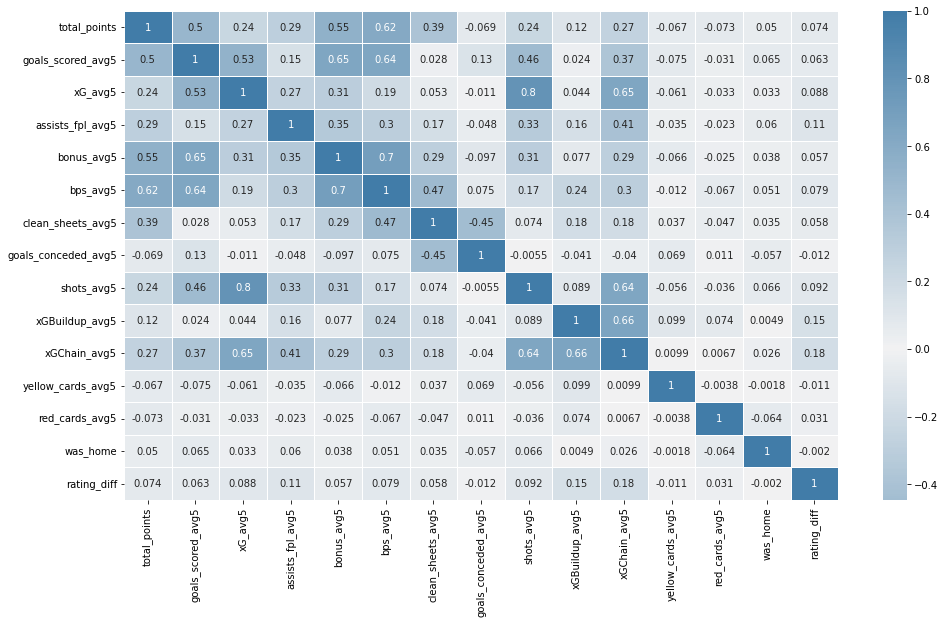

In [5]:
# plot the heatmap
fig = plt.gcf()
fig.set_size_inches(16, 9)
cmap = sns.diverging_palette(240,240, as_cmap=True)
sns.heatmap(corr, center=0, linewidth=0.5, cmap=cmap, annot=True)